Getting the filtered data

In [2]:
import sys  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os
import pandas_ta as ta

# Ensure the directories are in the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Data_Management')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Universe_Selection')))

# Import the modules
from data import Data
from coarse import Coarse_1 as Coarse
from fine import Fine_1 as Fine
from calculations import Calculations

Skipping category 'layer-1', already processed.
Skipping category 'depin', already processed.
Skipping category 'proof-of-work-pow', already processed.
Skipping category 'proof-of-stake-pos', already processed.
Skipping category 'meme-token', already processed.
Skipping category 'dog-themed-coins', already processed.
Skipping category 'eth-2-0-staking', already processed.
Skipping category 'non-fungible-tokens-nft', already processed.
Skipping category 'governance', already processed.
Skipping category 'artificial-intelligence', already processed.
Skipping category 'infrastructure', already processed.
Skipping category 'layer-2', already processed.
Skipping category 'zero-knowledge-zk', already processed.
Skipping category 'storage', already processed.
Skipping category 'oracle', already processed.
Skipping category 'bitcoin-fork', already processed.
Skipping category 'restaking', already processed.
Skipping category 'rollup', already processed.
Skipping category 'metaverse', already p

In [4]:
#Get the data
symbols = ['BTCUSDT', 'ETHUSDT']
interval = '1d'
start_time = dt.datetime(2021, 1, 1)
end_time = dt.datetime(2021, 2, 10)

data = Data(symbols, interval, start_time, end_time).df

In [11]:
df = data.copy()

In [25]:
_df = df
_df

close  creturns      high  log_return       low  \
date                                                                     
2021-01-02 BTCUSDT  32178.33  1.097050  33300.00    0.092625  28946.53   
           ETHUSDT    774.56  1.062628    787.69    0.060745    714.91   
2021-01-03 BTCUSDT  33000.05  1.125065  34778.11    0.025216  31962.99   
           ETHUSDT    978.28  1.342114   1011.07    0.233501    768.71   
2021-01-04 BTCUSDT  31988.71  1.090585  33600.00   -0.031126  28130.00   
...                      ...       ...       ...         ...       ...   
2021-02-07 ETHUSDT   1611.62  2.211000   1693.00   -0.039379   1490.46   
2021-02-08 BTCUSDT  46374.87  1.581050  46794.45    0.178449  37988.89   
           ETHUSDT   1750.15  2.401051   1775.57    0.082462   1563.89   
2021-02-09 BTCUSDT  46420.42  1.582603  48142.19    0.000982  44961.09   
           ETHUSDT   1769.13  2.427090   1821.88    0.010786   1708.49   

                        open     price   returns        volume  \
date                                                             
2021-01-02 BTCUSDT  29331.70  32178.33  0.097050  1.299939e+05   
           ETHUSDT    728.91    774.56  0.062628  1.352619e+06   
2021-01-03 BTCUSDT  32176.45  33000.05  0.025536  1.209576e+05   
           ETHUSDT    774.44    978.28  0.263014  2.813604e+06   
2021-01-04 BTCUSDT  33000.05  31988.71 -0.030647  1.408999e+05   
...                      ...       ...       ...           ...   
2021-02-07 ETHUSDT   1676.35   1611.62 -0.038614  1.281735e+06   
2021-02-08 BTCUSDT  38795.69  46374.87  0.195361  1.385975e+05   
           ETHUSDT   1611.46   1750.15  0.085957  1.339777e+06   
2021-02-09 BTCUSDT  46374.86  46420.42  0.000982  1.154999e+05   
           ETHUSDT   1749.68   1769.13  0.010845  1.185072e+06   

                    volume_in_dollars  SUPERT_7_3.0  SUPERTd_7_3.0  \
date                                                                 
2021-01-02 BTCUSDT       4.182986e+09      0.000000              1   
           ETHUSDT       1.047684e+09      0.000000              1   
2021-01-03 BTCUSDT       3.991606e+09           NaN              1   
           ETHUSDT       2.752492e+09           NaN              1   
2021-01-04 BTCUSDT       4.507206e+09           NaN              1   
...                               ...           ...            ...   
2021-02-07 ETHUSDT       2.065670e+09   1264.634873              1   
2021-02-08 BTCUSDT       6.427443e+09  31637.999881              1   
           ETHUSDT       2.344811e+09   1264.634873              1   
2021-02-09 BTCUSDT       5.361552e+09  35971.375446              1   
           ETHUSDT       2.096546e+09   1305.016042              1   

                    SUPERTl_7_3.0  SUPERTs_7_3.0  
date                                              
2021-01-02 BTCUSDT            NaN            NaN  
           ETHUSDT            NaN            NaN  
2021-01-03 BTCUSDT            NaN            NaN  
           ETHUSDT            NaN            NaN  
2021-01-04 BTCUSDT            NaN            NaN  
...                           ...            ...  
2021-02-07 ETHUSDT    1264.634873            NaN  
2021-02-08 BTCUSDT   31637.999881            NaN  
           ETHUSDT    1264.634873            NaN  
2021-02-09 BTCUSDT   35971.375446            NaN  
           ETHUSDT    1305.016042            NaN  

[78 rows x 14 columns]

---

## Entry Signal: Trend Following

### SuperTrend

In [26]:

df = df.unstack()
df.head(2)

close          creturns                high           \
             BTCUSDT ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                  
2021-01-02  32178.33  774.56  1.097050  1.062628  33300.00   787.69   
2021-01-03  33000.05  978.28  1.125065  1.342114  34778.11  1011.07   

           log_return                 low          ... volume_in_dollars  \
              BTCUSDT   ETHUSDT   BTCUSDT ETHUSDT  ...           BTCUSDT   
date                                               ...                     
2021-01-02   0.092625  0.060745  28946.53  714.91  ...      4.182986e+09   
2021-01-03   0.025216  0.233501  31962.99  768.71  ...      3.991606e+09   

                         SUPERT_7_3.0         SUPERTd_7_3.0          \
                 ETHUSDT      BTCUSDT ETHUSDT       BTCUSDT ETHUSDT   
date                                                                  
2021-01-02  1.047684e+09          0.0     0.0             1       1   
2021-01-03  2.752492e+09          NaN     NaN             1       1   

           SUPERTl_7_3.0         SUPERTs_7_3.0          
                 BTCUSDT ETHUSDT       BTCUSDT ETHUSDT  
date                                                    
2021-01-02           NaN     NaN           NaN     NaN  
2021-01-03           NaN     NaN           NaN     NaN  

[2 rows x 28 columns]

In [27]:
for coin in df.columns.levels[1]:
    print(coin)

BTCUSDT
ETHUSDT


In [28]:
str_length = 7
str_multiplier = 3

supertrend_results = {}
# Iterate through each coin
for coin in df.columns.levels[1]:  # Get unique coin names
    # Extract high, low, close for the coin
    high, low, close = df["high", coin], df["low", coin], df["close", coin]

    # Calculate Supertrend
    supertrend = ta.supertrend(high, low, close)

    supertrend_results[coin] = supertrend



In [29]:
supertrend_df = pd.concat(supertrend_results, axis=1)
supertrend_df.head()

BTCUSDT                                            \
           SUPERT_7_3.0 SUPERTd_7_3.0 SUPERTl_7_3.0 SUPERTs_7_3.0   
date                                                                
2021-01-02          0.0             1           NaN           NaN   
2021-01-03          NaN             1           NaN           NaN   
2021-01-04          NaN             1           NaN           NaN   
2021-01-05          NaN             1           NaN           NaN   
2021-01-06          NaN             1           NaN           NaN   

                ETHUSDT                                            
           SUPERT_7_3.0 SUPERTd_7_3.0 SUPERTl_7_3.0 SUPERTs_7_3.0  
date                                                               
2021-01-02          0.0             1           NaN           NaN  
2021-01-03          NaN             1           NaN           NaN  
2021-01-04          NaN             1           NaN           NaN  
2021-01-05          NaN             1           NaN           NaN  
2021-01-06          NaN             1           NaN           NaN

In [30]:
# Identify the last main column
last_main_column = supertrend_df.columns.levels[0][-1]
supertrend_df[last_main_column].head(2)

,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0
date,,,,
2021-01-02,0.0,1,NaN,NaN
2021-01-03,NaN,1,NaN,NaN


In [31]:
# supertrend_df.drop(columns=last_main_column, level=0, inplace = True)

In [32]:
supertrend_df.head(2)

BTCUSDT                                            \
           SUPERT_7_3.0 SUPERTd_7_3.0 SUPERTl_7_3.0 SUPERTs_7_3.0   
date                                                                
2021-01-02          0.0             1           NaN           NaN   
2021-01-03          NaN             1           NaN           NaN   

                ETHUSDT                                            
           SUPERT_7_3.0 SUPERTd_7_3.0 SUPERTl_7_3.0 SUPERTs_7_3.0  
date                                                               
2021-01-02          0.0             1           NaN           NaN  
2021-01-03          NaN             1           NaN           NaN

In [33]:
supertrend_df = supertrend_df.swaplevel(axis=1).sort_index(axis=1)
supertrend_df.head(2)

SUPERT_7_3.0         SUPERTd_7_3.0         SUPERTl_7_3.0          \
                BTCUSDT ETHUSDT       BTCUSDT ETHUSDT       BTCUSDT ETHUSDT   
date                                                                          
2021-01-02          0.0     0.0             1       1           NaN     NaN   
2021-01-03          NaN     NaN             1       1           NaN     NaN   

           SUPERTs_7_3.0          
                 BTCUSDT ETHUSDT  
date                              
2021-01-02           NaN     NaN  
2021-01-03           NaN     NaN

In [34]:
final_df = pd.concat([df, supertrend_df], axis = 1)

In [35]:
final_df.head(2)

close          creturns                high           \
             BTCUSDT ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                  
2021-01-02  32178.33  774.56  1.097050  1.062628  33300.00   787.69   
2021-01-03  33000.05  978.28  1.125065  1.342114  34778.11  1011.07   

           log_return                 low          ... SUPERTs_7_3.0          \
              BTCUSDT   ETHUSDT   BTCUSDT ETHUSDT  ...       BTCUSDT ETHUSDT   
date                                               ...                         
2021-01-02   0.092625  0.060745  28946.53  714.91  ...           NaN     NaN   
2021-01-03   0.025216  0.233501  31962.99  768.71  ...           NaN     NaN   

           SUPERT_7_3.0         SUPERTd_7_3.0         SUPERTl_7_3.0          \
                BTCUSDT ETHUSDT       BTCUSDT ETHUSDT       BTCUSDT ETHUSDT   
date                                                                          
2021-01-02          0.0     0.0             1       1           NaN     NaN   
2021-01-03          NaN     NaN             1       1           NaN     NaN   

           SUPERTs_7_3.0          
                 BTCUSDT ETHUSDT  
date                              
2021-01-02           NaN     NaN  
2021-01-03           NaN     NaN  

[2 rows x 36 columns]

In [36]:
#Now to make a trade and a position column
df = final_df
df = df.stack(future_stack = True)
df

ValueError: Columns with duplicate values are not supported in stack

In [23]:
final_df.columns.levels[1]

Index(['BTCUSDT', 'ETHUSDT'], dtype='object')

In [37]:
test = _df

Putting everything together into one function

In [90]:
class Trend_Following():
    
    def __init__(self):
        pass

    def supertrend_signals(self, df, length = 7, multiplier = 3):
        _df = df.copy().unstack()

        supertrend_results = {}
        # Iterate through each coin
        for coin in _df.columns.get_level_values(1).unique():  # Get unique coin names
            # Extract high, low, close for the coin
            high, low, close = _df["high", coin], _df["low", coin], _df["close", coin]

            # Calculate Supertrend
            supertrend = ta.supertrend(high, low, close, length, multiplier)

            supertrend_results[coin] = supertrend

        # Create a dataframe from the results
        supertrend_df = pd.concat(supertrend_results, axis=1)
        supertrend_df = supertrend_df.swaplevel(axis=1).sort_index(axis=1)

        _df = pd.concat([_df, supertrend_df], axis = 1)
        
        #Generate signals
        for coin in _df.columns.get_level_values(1):
            signal = (_df[f'SUPERTd_{length}_{float(multiplier)}', coin] == 1) & (_df[f'SUPERTd_{length}_{float(multiplier)}', coin].shift() == -1)
            _df['entry_signals', coin] = signal.astype(int)
            _df['entry_signals', coin] = _df['entry_signals', coin].shift().replace(np.nan, 0)

        # Stack the dataframe and get position and trades columns
        _df = _df.stack(future_stack=True)

        return _df

In [91]:
tf = Trend_Following()
_df = tf.supertrend_signals(test)
_df

close  creturns      high  log_return  \
date                                                                    
2020-12-31 19:00:00 BTCUSDT  29331.69       NaN  29600.00         NaN   
                    ETHUSDT    728.91       NaN    749.00         NaN   
2021-01-01 19:00:00 BTCUSDT  32178.33  1.097050  33300.00    0.092625   
                    ETHUSDT    774.56  1.062628    787.69    0.060745   
2021-01-02 19:00:00 BTCUSDT  33000.05  1.125065  34778.11    0.025216   
...                               ...       ...       ...         ...   
2021-02-06 19:00:00 ETHUSDT   1611.62  2.211000   1693.00   -0.039379   
2021-02-07 19:00:00 BTCUSDT  46374.87  1.581050  46794.45    0.178449   
                    ETHUSDT   1750.15  2.401051   1775.57    0.082462   
2021-02-08 19:00:00 BTCUSDT  46420.42  1.582603  48142.19    0.000982   
                    ETHUSDT   1769.13  2.427090   1821.88    0.010786   

                                  low      open     price   returns  \
date                                                                  
2020-12-31 19:00:00 BTCUSDT  28624.57  28923.63  29331.69       NaN   
                    ETHUSDT    714.29    736.42    728.91       NaN   
2021-01-01 19:00:00 BTCUSDT  28946.53  29331.70  32178.33  0.097050   
                    ETHUSDT    714.91    728.91    774.56  0.062628   
2021-01-02 19:00:00 BTCUSDT  31962.99  32176.45  33000.05  0.025536   
...                               ...       ...       ...       ...   
2021-02-06 19:00:00 ETHUSDT   1490.46   1676.35   1611.62 -0.038614   
2021-02-07 19:00:00 BTCUSDT  37988.89  38795.69  46374.87  0.195361   
                    ETHUSDT   1563.89   1611.46   1750.15  0.085957   
2021-02-08 19:00:00 BTCUSDT  44961.09  46374.86  46420.42  0.000982   
                    ETHUSDT   1708.49   1749.68   1769.13  0.010845   

                                   volume  volume_in_dollars  ...  \
date                                                          ...   
2020-12-31 19:00:00 BTCUSDT  5.418293e+04       1.589277e+09  ...   
                    ETHUSDT  6.751141e+05       4.920974e+08  ...   
2021-01-01 19:00:00 BTCUSDT  1.299939e+05       4.182986e+09  ...   
                    ETHUSDT  1.352619e+06       1.047684e+09  ...   
2021-01-02 19:00:00 BTCUSDT  1.209576e+05       3.991606e+09  ...   
...                                   ...                ...  ...   
2021-02-06 19:00:00 ETHUSDT  1.281735e+06       2.065670e+09  ...   
2021-02-07 19:00:00 BTCUSDT  1.385975e+05       6.427443e+09  ...   
                    ETHUSDT  1.339777e+06       2.344811e+09  ...   
2021-02-08 19:00:00 BTCUSDT  1.154999e+05       5.361552e+09  ...   
                    ETHUSDT  1.185072e+06       2.096546e+09  ...   

                             volume_rank  std_values  std_rank         ema_2  \
date                                                                           
2020-12-31 19:00:00 BTCUSDT          2.0         NaN       NaN           NaN   
                    ETHUSDT          1.0         NaN       NaN           NaN   
2021-01-01 19:00:00 BTCUSDT          2.0    0.065449       1.0  30755.010000   
                    ETHUSDT          1.0    0.042940       2.0    751.735000   
2021-01-02 19:00:00 BTCUSDT          2.0    0.017829       2.0  32251.703333   
...                                  ...         ...       ...           ...   
2021-02-06 19:00:00 ETHUSDT          1.0    0.027842       1.0   1633.395266   
2021-02-07 19:00:00 BTCUSDT          2.0    0.125848       1.0  43840.978333   
                    ETHUSDT          1.0    0.058276       2.0   1711.231755   
2021-02-08 19:00:00 BTCUSDT          2.0    0.000694       2.0  45560.606111   
                    ETHUSDT          1.0    0.007627       1.0   1749.830585   

                             above_ema  SUPERT_7_3.0  SUPERTd_7_3.0  \
date                                                                  
2020-12-31 19:00:00 BTCUSDT          0      0.000000              1   
      

---

## Entry Signal: Mean Reversion

### Last Day's Low

In [3]:
#First, reimport the data on 1h granularity
symbols = ['BTCUSDT', 'ETHUSDT']
interval = '1h'
start_time = dt.datetime(2024, 1, 1)
end_time = dt.datetime(2024, 11, 10)
data = Data(symbols, '1h', start_time, end_time).df

---

##### To get the Daily Data:

method 1:

In [8]:
start_time = data.index.levels[0][0].strftime('%Y-%m-%d')
end_time = data.index.levels[0][-1].strftime('%Y-%m-%d')
symbols = data.index.levels[1].unique()

In [9]:
data

close  creturns      high  log_return  \
date                coin                                                
2024-01-01 01:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2024-01-01 02:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
                    ETHUSDT   2293.02  0.998915   2304.72   -0.004655   
2024-01-01 03:00:00 BTCUSDT  42330.49  0.996592  42586.64   -0.005903   
...                               ...       ...       ...         ...   
2024-11-09 21:00:00 ETHUSDT   3076.97  1.340430   3087.00   -0.003018   
2024-11-09 22:00:00 BTCUSDT  76519.90  1.801518  76606.34    0.000893   
                    ETHUSDT   3134.37  1.365435   3142.67    0.018483   
2024-11-09 23:00:00 BTCUSDT  76677.46  1.805228  76900.00    0.002057   
                    ETHUSDT   3126.21  1.361880   3157.40   -0.002607   

                                  low      open     price   returns  \
date                coin                                              
2024-01-01 01:00:00 BTCUSDT  42431.65  42475.23  42613.56  0.003257   
                    ETHUSDT   2292.90   2295.52   2303.72  0.003577   
2024-01-01 02:00:00 BTCUSDT  42500.00  42613.57  42581.10 -0.000762   
                    ETHUSDT   2291.20   2303.72   2293.02 -0.004645   
2024-01-01 03:00:00 BTCUSDT  42230.08  42581.09  42330.49 -0.005885   
...                               ...       ...       ...       ...   
2024-11-09 21:00:00 ETHUSDT   3072.60   3086.27   3076.97 -0.003013   
2024-11-09 22:00:00 BTCUSDT  76365.25  76451.61  76519.90  0.000893   
                    ETHUSDT   3073.13   3076.97   3134.37  0.018655   
2024-11-09 23:00:00 BTCUSDT  76474.00  76519.90  76677.46  0.002059   
                    ETHUSDT   3115.39   3134.36   3126.21 -0.002603   

                                  volume  volume_in_dollars  
date                coin                                     
2024-01-01 01:00:00 BTCUSDT   1196.37856       5.098195e+07  
                    ETHUSDT   8413.42600       1.938218e+07  
2024-01-01 02:00:00 BTCUSDT    685.21980       2.917741e+07  
                    ETHUSDT   5808.25330       1.331844e+07  
2024-01-01 03:00:00 BTCUSDT    794.80391       3.364444e+07  
...                                  ...                ...  
2024-11-09 21:00:00 ETHUSDT   8998.51870       2.768817e+07  
2024-11-09 22:00:00 BTCUSDT    610.63157       4.672547e+07  
                    ETHUSDT  36580.25380       1.146561e+08  
2024-11-09 23:00:00 BTCUSDT   1773.62628       1.359972e+08  
                    ETHUSDT  42957.57720       1.342944e+08  

[15070 rows x 10 columns]

First we need to:
1. Get the daily data (notice that we need the start of the day to align with the crypto daily candle start time (at 0 AM UTC))
2. ffill all the values to the hourly dataframe
3. create a direction column check if the last close is lower than last day low and current close is higher than last day low\
make sure to not look for current close then future close (this is going to be forward looking)

In [10]:
data_daily = Data(symbols, '1d', start_time, end_time).df
data_daily = data_daily[['open', 'high', 'low', 'close']]
data_daily = data_daily.unstack().shift(1).stack()
data_daily.columns = [f'shifted_daily_{col}' for col in data_daily.columns]
data_daily


C:\Users\yassi\AppData\Local\Temp\ipykernel_13056\1790223356.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data_daily = data_daily.unstack().shift(1).stack()


shifted_daily_open  shifted_daily_high  shifted_daily_low  \
date       coin                                                                 
2024-01-03 BTCUSDT            44179.55            45879.63           44148.34   
           ETHUSDT             2352.05             2431.30            2341.00   
2024-01-04 BTCUSDT            44946.91            45500.00           40750.00   
           ETHUSDT             2355.35             2385.45            2100.00   
2024-01-05 BTCUSDT            42845.23            44729.58           42613.77   
...                                ...                 ...                ...   
2024-11-06 ETHUSDT             2398.21             2480.00            2380.74   
2024-11-07 BTCUSDT            69372.01            76400.00           69298.00   
           ETHUSDT             2422.60             2744.70            2420.30   
2024-11-08 BTCUSDT            75571.99            76849.99           74416.00   
           ETHUSDT             2721.88             2916.11            2699.49   

                    shifted_daily_close  
date       coin                          
2024-01-03 BTCUSDT             44946.91  
           ETHUSDT              2355.34  
2024-01-04 BTCUSDT             42845.23  
           ETHUSDT              2209.72  
2024-01-05 BTCUSDT             44151.10  
...                                 ...  
2024-11-06 ETHUSDT              2422.55  
2024-11-07 BTCUSDT             75571.99  
           ETHUSDT              2721.87  
2024-11-08 BTCUSDT             75857.89  
           ETHUSDT              2895.47  

[622 rows x 4 columns]

In [11]:
data_daily

shifted_daily_open  shifted_daily_high  shifted_daily_low  \
date       coin                                                                 
2024-01-03 BTCUSDT            44179.55            45879.63           44148.34   
           ETHUSDT             2352.05             2431.30            2341.00   
2024-01-04 BTCUSDT            44946.91            45500.00           40750.00   
           ETHUSDT             2355.35             2385.45            2100.00   
2024-01-05 BTCUSDT            42845.23            44729.58           42613.77   
...                                ...                 ...                ...   
2024-11-06 ETHUSDT             2398.21             2480.00            2380.74   
2024-11-07 BTCUSDT            69372.01            76400.00           69298.00   
           ETHUSDT             2422.60             2744.70            2420.30   
2024-11-08 BTCUSDT            75571.99            76849.99           74416.00   
           ETHUSDT             2721.88             2916.11            2699.49   

                    shifted_daily_close  
date       coin                          
2024-01-03 BTCUSDT             44946.91  
           ETHUSDT              2355.34  
2024-01-04 BTCUSDT             42845.23  
           ETHUSDT              2209.72  
2024-01-05 BTCUSDT             44151.10  
...                                 ...  
2024-11-06 ETHUSDT              2422.55  
2024-11-07 BTCUSDT             75571.99  
           ETHUSDT              2721.87  
2024-11-08 BTCUSDT             75857.89  
           ETHUSDT              2895.47  

[622 rows x 4 columns]

In [12]:
data_daily_reindexed = data_daily.unstack().reindex(data[~data.index.duplicated()].unstack().index.get_level_values(0))\
    .ffill().stack(future_stack = True)
data_daily_reindexed.head(10)

shifted_daily_open  shifted_daily_high  \
date                coin                                              
2024-01-01 01:00:00 BTCUSDT                 NaN                 NaN   
                    ETHUSDT                 NaN                 NaN   
2024-01-01 02:00:00 BTCUSDT                 NaN                 NaN   
                    ETHUSDT                 NaN                 NaN   
2024-01-01 03:00:00 BTCUSDT                 NaN                 NaN   
                    ETHUSDT                 NaN                 NaN   
2024-01-01 04:00:00 BTCUSDT                 NaN                 NaN   
                    ETHUSDT                 NaN                 NaN   
2024-01-01 05:00:00 BTCUSDT                 NaN                 NaN   
                    ETHUSDT                 NaN                 NaN   

                             shifted_daily_low  shifted_daily_close  
date                coin                                             
2024-01-01 01:00:00 BTCUSDT                NaN                  NaN  
                    ETHUSDT                NaN                  NaN  
2024-01-01 02:00:00 BTCUSDT                NaN                  NaN  
                    ETHUSDT                NaN                  NaN  
2024-01-01 03:00:00 BTCUSDT                NaN                  NaN  
                    ETHUSDT                NaN                  NaN  
2024-01-01 04:00:00 BTCUSDT                NaN                  NaN  
                    ETHUSDT                NaN                  NaN  
2024-01-01 05:00:00 BTCUSDT                NaN                  NaN  
                    ETHUSDT                NaN                  NaN

In [13]:
df_2 = pd.concat([data, data_daily_reindexed], axis = 1)
df_2.head()

close  creturns      high  log_return  \
date                coin                                                
2024-01-01 01:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2024-01-01 02:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
                    ETHUSDT   2293.02  0.998915   2304.72   -0.004655   
2024-01-01 03:00:00 BTCUSDT  42330.49  0.996592  42586.64   -0.005903   

                                  low      open     price   returns  \
date                coin                                              
2024-01-01 01:00:00 BTCUSDT  42431.65  42475.23  42613.56  0.003257   
                    ETHUSDT   2292.90   2295.52   2303.72  0.003577   
2024-01-01 02:00:00 BTCUSDT  42500.00  42613.57  42581.10 -0.000762   
                    ETHUSDT   2291.20   2303.72   2293.02 -0.004645   
2024-01-01 03:00:00 BTCUSDT  42230.08  42581.09  42330.49 -0.005885   

                                 volume  volume_in_dollars  \
date                coin                                     
2024-01-01 01:00:00 BTCUSDT  1196.37856       5.098195e+07   
                    ETHUSDT  8413.42600       1.938218e+07   
2024-01-01 02:00:00 BTCUSDT   685.21980       2.917741e+07   
                    ETHUSDT  5808.25330       1.331844e+07   
2024-01-01 03:00:00 BTCUSDT   794.80391       3.364444e+07   

                             shifted_daily_open  shifted_daily_high  \
date                coin                                              
2024-01-01 01:00:00 BTCUSDT                 NaN                 NaN   
                    ETHUSDT                 NaN                 NaN   
2024-01-01 02:00:00 BTCUSDT                 NaN                 NaN   
                    ETHUSDT                 NaN                 NaN   
2024-01-01 03:00:00 BTCUSDT                 NaN                 NaN   

                             shifted_daily_low  shifted_daily_close  
date                coin                                             
2024-01-01 01:00:00 BTCUSDT                NaN                  NaN  
                    ETHUSDT                NaN                  NaN  
2024-01-01 02:00:00 BTCUSDT                NaN                  NaN  
                    ETHUSDT                NaN                  NaN  
2024-01-01 03:00:00 BTCUSDT                NaN                  NaN

---

Method #2: Downsampling

In [4]:
data

close  creturns      high  log_return  \
date                coin                                                
2024-01-01 01:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2024-01-01 02:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
                    ETHUSDT   2293.02  0.998915   2304.72   -0.004655   
2024-01-01 03:00:00 BTCUSDT  42330.49  0.996592  42586.64   -0.005903   
...                               ...       ...       ...         ...   
2024-11-09 21:00:00 ETHUSDT   3076.97  1.340430   3087.00   -0.003018   
2024-11-09 22:00:00 BTCUSDT  76519.90  1.801518  76606.34    0.000893   
                    ETHUSDT   3134.37  1.365435   3142.67    0.018483   
2024-11-09 23:00:00 BTCUSDT  76677.46  1.805228  76900.00    0.002057   
                    ETHUSDT   3126.21  1.361880   3157.40   -0.002607   

                                  low      open     price   returns  \
date                coin                                              
2024-01-01 01:00:00 BTCUSDT  42431.65  42475.23  42613.56  0.003257   
                    ETHUSDT   2292.90   2295.52   2303.72  0.003577   
2024-01-01 02:00:00 BTCUSDT  42500.00  42613.57  42581.10 -0.000762   
                    ETHUSDT   2291.20   2303.72   2293.02 -0.004645   
2024-01-01 03:00:00 BTCUSDT  42230.08  42581.09  42330.49 -0.005885   
...                               ...       ...       ...       ...   
2024-11-09 21:00:00 ETHUSDT   3072.60   3086.27   3076.97 -0.003013   
2024-11-09 22:00:00 BTCUSDT  76365.25  76451.61  76519.90  0.000893   
                    ETHUSDT   3073.13   3076.97   3134.37  0.018655   
2024-11-09 23:00:00 BTCUSDT  76474.00  76519.90  76677.46  0.002059   
                    ETHUSDT   3115.39   3134.36   3126.21 -0.002603   

                                  volume  volume_in_dollars  
date                coin                                     
2024-01-01 01:00:00 BTCUSDT   1196.37856       5.098195e+07  
                    ETHUSDT   8413.42600       1.938218e+07  
2024-01-01 02:00:00 BTCUSDT    685.21980       2.917741e+07  
                    ETHUSDT   5808.25330       1.331844e+07  
2024-01-01 03:00:00 BTCUSDT    794.80391       3.364444e+07  
...                                  ...                ...  
2024-11-09 21:00:00 ETHUSDT   8998.51870       2.768817e+07  
2024-11-09 22:00:00 BTCUSDT    610.63157       4.672547e+07  
                    ETHUSDT  36580.25380       1.146561e+08  
2024-11-09 23:00:00 BTCUSDT   1773.62628       1.359972e+08  
                    ETHUSDT  42957.57720       1.342944e+08  

[15070 rows x 10 columns]

In [16]:
cal = Calculations()
htf_df = cal.downsample(data.copy())[[f'htf_{col}' for col in ['open', 'high', 'low', 'close', 'volume_in_dollars']]]

#Shift the htf_df by 1
htf_df = htf_df.unstack().shift(periods = 1, freq = 'D').stack(future_stack = True)

In [17]:
htf_df

htf_open  htf_high   htf_low  htf_close  \
date                coin                                               
2024-01-02 00:00:00 BTCUSDT  42475.23  44184.10  42180.77   44179.55   
                    ETHUSDT   2295.52   2352.37   2265.24    2352.04   
2024-01-02 01:00:00 BTCUSDT  42475.23  44184.10  42180.77   44179.55   
                    ETHUSDT   2295.52   2352.37   2265.24    2352.04   
2024-01-02 02:00:00 BTCUSDT  42475.23  44184.10  42180.77   44179.55   
...                               ...       ...       ...        ...   
2024-11-10 21:00:00 ETHUSDT   2961.75   3157.40   2953.71    3126.21   
2024-11-10 22:00:00 BTCUSDT  76509.78  76900.00  75714.66   76677.46   
                    ETHUSDT   2961.75   3157.40   2953.71    3126.21   
2024-11-10 23:00:00 BTCUSDT  76509.78  76900.00  75714.66   76677.46   
                    ETHUSDT   2961.75   3157.40   2953.71    3126.21   

                             htf_volume_in_dollars  
date                coin                            
2024-01-02 00:00:00 BTCUSDT           1.117400e+09  
                    ETHUSDT           4.759713e+08  
2024-01-02 01:00:00 BTCUSDT           1.117400e+09  
                    ETHUSDT           4.759713e+08  
2024-01-02 02:00:00 BTCUSDT           1.117400e+09  
...                                            ...  
2024-11-10 21:00:00 ETHUSDT           1.604590e+09  
2024-11-10 22:00:00 BTCUSDT           1.294511e+09  
                    ETHUSDT           1.604590e+09  
2024-11-10 23:00:00 BTCUSDT           1.294511e+09  
                    ETHUSDT           1.604590e+09  

[15072 rows x 5 columns]

In [18]:
htf_df.columns = [f'shifted_{col}' for col in htf_df.columns]
htf_df.columns

Index(['shifted_htf_open', 'shifted_htf_high', 'shifted_htf_low',
       'shifted_htf_close', 'shifted_htf_volume_in_dollars'],
      dtype='object')

In [39]:
htf_reindexed = htf_df.unstack().reindex(data[~data.index.duplicated()].unstack().index.get_level_values(0))\
    .ffill().stack(future_stack = True)
df = pd.concat([data, htf_reindexed], axis = 1)

In [40]:
df.head()

close  creturns      high  log_return  \
date                coin                                                
2024-01-01 01:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2024-01-01 02:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
                    ETHUSDT   2293.02  0.998915   2304.72   -0.004655   
2024-01-01 03:00:00 BTCUSDT  42330.49  0.996592  42586.64   -0.005903   

                                  low      open     price   returns  \
date                coin                                              
2024-01-01 01:00:00 BTCUSDT  42431.65  42475.23  42613.56  0.003257   
                    ETHUSDT   2292.90   2295.52   2303.72  0.003577   
2024-01-01 02:00:00 BTCUSDT  42500.00  42613.57  42581.10 -0.000762   
                    ETHUSDT   2291.20   2303.72   2293.02 -0.004645   
2024-01-01 03:00:00 BTCUSDT  42230.08  42581.09  42330.49 -0.005885   

                                 volume  volume_in_dollars  shifted_htf_open  \
date                coin                                                       
2024-01-01 01:00:00 BTCUSDT  1196.37856       5.098195e+07               NaN   
                    ETHUSDT  8413.42600       1.938218e+07               NaN   
2024-01-01 02:00:00 BTCUSDT   685.21980       2.917741e+07               NaN   
                    ETHUSDT  5808.25330       1.331844e+07               NaN   
2024-01-01 03:00:00 BTCUSDT   794.80391       3.364444e+07               NaN   

                             shifted_htf_high  shifted_htf_low  \
date                coin                                         
2024-01-01 01:00:00 BTCUSDT               NaN              NaN   
                    ETHUSDT               NaN              NaN   
2024-01-01 02:00:00 BTCUSDT               NaN              NaN   
                    ETHUSDT               NaN              NaN   
2024-01-01 03:00:00 BTCUSDT               NaN              NaN   

                             shifted_htf_close  shifted_htf_volume_in_dollars  
date                coin                                                       
2024-01-01 01:00:00 BTCUSDT                NaN                            NaN  
                    ETHUSDT                NaN                            NaN  
2024-01-01 02:00:00 BTCUSDT                NaN                            NaN  
                    ETHUSDT                NaN                            NaN  
2024-01-01 03:00:00 BTCUSDT                NaN                            NaN

In [41]:
#Now to generate a direction column:
# 1 if the close is above the daily close and last open is above the daily close and last close is below the daily close

#Before that, we need to make sure we are dealing with the same date when comparing the daily low with the hourly closes
#Temporarily unstack it
_df = df[[]].copy() #We don't need any of the columns, just the index (removing them to make sure it runs faster)


In [42]:
# Extract the date part from the datetime index
_df['date_only'] = _df.index.get_level_values(0).strftime('%Y-%m-%d')
_df['date_only']

date                 coin   
2024-01-01 01:00:00  BTCUSDT    2024-01-01
                     ETHUSDT    2024-01-01
2024-01-01 02:00:00  BTCUSDT    2024-01-01
                     ETHUSDT    2024-01-01
2024-01-01 03:00:00  BTCUSDT    2024-01-01
                                   ...    
2024-11-09 21:00:00  ETHUSDT    2024-11-09
2024-11-09 22:00:00  BTCUSDT    2024-11-09
                     ETHUSDT    2024-11-09
2024-11-09 23:00:00  BTCUSDT    2024-11-09
                     ETHUSDT    2024-11-09
Name: date_only, Length: 15070, dtype: object

In [43]:

# Shift the date column by one row
_df['previous_date'] = _df['date_only'].shift(1)

# Compare the current date with the previous date
_df['same_date'] = _df['date_only'] == _df['previous_date']

In [44]:
_df.unstack()

date_only             previous_date              \
coin                    BTCUSDT     ETHUSDT       BTCUSDT     ETHUSDT   
date                                                                    
2024-01-01 01:00:00  2024-01-01  2024-01-01          None  2024-01-01   
2024-01-01 02:00:00  2024-01-01  2024-01-01    2024-01-01  2024-01-01   
2024-01-01 03:00:00  2024-01-01  2024-01-01    2024-01-01  2024-01-01   
2024-01-01 04:00:00  2024-01-01  2024-01-01    2024-01-01  2024-01-01   
2024-01-01 05:00:00  2024-01-01  2024-01-01    2024-01-01  2024-01-01   
...                         ...         ...           ...         ...   
2024-11-09 19:00:00  2024-11-09  2024-11-09    2024-11-09  2024-11-09   
2024-11-09 20:00:00  2024-11-09  2024-11-09    2024-11-09  2024-11-09   
2024-11-09 21:00:00  2024-11-09  2024-11-09    2024-11-09  2024-11-09   
2024-11-09 22:00:00  2024-11-09  2024-11-09    2024-11-09  2024-11-09   
2024-11-09 23:00:00  2024-11-09  2024-11-09    2024-11-09  2024-11-09   

                    same_date          
coin                  BTCUSDT ETHUSDT  
date                                   
2024-01-01 01:00:00     False    True  
2024-01-01 02:00:00      True    True  
2024-01-01 03:00:00      True    True  
2024-01-01 04:00:00      True    True  
2024-01-01 05:00:00      True    True  
...                       ...     ...  
2024-11-09 19:00:00      True    True  
2024-11-09 20:00:00      True    True  
2024-11-09 21:00:00      True    True  
2024-11-09 22:00:00      True    True  
2024-11-09 23:00:00      True    True  

[7535 rows x 6 columns]

In [45]:
df.unstack()

close           creturns                high           \
coin                  BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2024-01-01 01:00:00  42613.56  2303.72  1.003257  1.003577  42775.00  2306.60   
2024-01-01 02:00:00  42581.10  2293.02  1.002493  0.998915  42638.41  2304.72   
2024-01-01 03:00:00  42330.49  2273.81  0.996592  0.990547  42586.64  2294.50   
2024-01-01 04:00:00  42399.99  2279.55  0.998229  0.993047  42399.99  2279.86   
2024-01-01 05:00:00  42234.01  2275.89  0.994321  0.991453  42406.00  2283.36   
...                       ...      ...       ...       ...       ...      ...   
2024-11-09 19:00:00  76204.92  3070.39  1.794103  1.337563  76700.00  3094.55   
2024-11-09 20:00:00  76294.00  3086.27  1.796200  1.344481  76360.00  3090.36   
2024-11-09 21:00:00  76451.60  3076.97  1.799910  1.340430  76486.00  3087.00   
2024-11-09 22:00:00  76519.90  3134.37  1.801518  1.365435  76606.34  3142.67   
2024-11-09 23:00:00  76677.46  3126.21  1.805228  1.361880  76900.00  3157.40   

                    log_return                 low           ...  \
coin                   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   
date                                                         ...   
2024-01-01 01:00:00   0.003251  0.003570  42431.65  2292.90  ...   
2024-01-01 02:00:00  -0.000762 -0.004655  42500.00  2291.20  ...   
2024-01-01 03:00:00  -0.005903 -0.008413  42230.08  2271.00  ...   
2024-01-01 04:00:00   0.001640  0.002521  42209.46  2265.24  ...   
2024-01-01 05:00:00  -0.003922 -0.001607  42180.77  2272.62  ...   
...                        ...       ...       ...      ...  ...   
2024-11-09 19:00:00  -0.001988  0.006824  76116.00  3048.50  ...   
2024-11-09 20:00:00   0.001168  0.005159  76179.00  3065.56  ...   
2024-11-09 21:00:00   0.002064 -0.003018  76227.52  3072.60  ...   
2024-11-09 22:00:00   0.000893  0.018483  76365.25  3073.13  ...   
2024-11-09 23:00:00   0.002057 -0.002607  76474.00  3115.39  ...   

                    shifted_htf_open          shifted_htf_high           \
coin                         BTCUSDT  ETHUSDT          BTCUSDT  ETHUSDT   
date                                                                      
2024-01-01 01:00:00              NaN      NaN              NaN      NaN   
2024-01-01 02:00:00              NaN      NaN              NaN      NaN   
2024-01-01 03:00:00              NaN      NaN              NaN      NaN   
2024-01-01 04:00:00              NaN      NaN              NaN      NaN   
2024-01-01 05:00:00              NaN      NaN              NaN      NaN   
...                              ...      ...              ...      ...   
2024-11-09 19:00:00         75857.89  2895.47         77199.99  2981.69   
2024-11-09 20:00:00         75857.89  2895.47         77199.99  2981.69   
2024-11-09 21:00:00         75857.89  2895.47         77199.99  2981.69   
2024-11-09 22:00:00         75857.89  2895.47         77199.99  2981.69   
2024-11-09 23:00:00         75857.89  2895.47         77199.99  2981.69   

                    shifted_htf_low         shifted_htf_close           \
coin                        BTCUSDT ETHUSDT           BTCUSDT  ETHUSDT   
date                                                                     
2024-01-01 01:00:00             NaN     NaN               NaN      NaN   
2024-01-01 02:00:00             NaN     NaN               NaN      NaN   
2024-01-01 03:00:00             NaN     NaN               NaN      NaN   
2024-01-01 04:00:00             NaN     NaN               NaN      NaN   
2024-01-01 05:00:00             NaN     NaN               NaN      NaN   
...                             ...     ...               ...      ...   
2024-11-09 19:00:00         75555.0  2886.4          76509.78  2961.75   
2024-11-09 20:00:00         75555.0  2886.4          76509.78  2961.75   
2024-11-09 21:00:00         75555.0  2886.4          76509.78  2961.75 

In [46]:
#Check if they have the same index, necessary for the comparison
df.unstack().index.equals(_df.unstack().index)

True

In [47]:
hourly_lookback = 1
df['same_date']  = _df['same_date']
df = df.unstack()
df.head()

close           creturns                high           \
coin                  BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2024-01-01 01:00:00  42613.56  2303.72  1.003257  1.003577  42775.00  2306.60   
2024-01-01 02:00:00  42581.10  2293.02  1.002493  0.998915  42638.41  2304.72   
2024-01-01 03:00:00  42330.49  2273.81  0.996592  0.990547  42586.64  2294.50   
2024-01-01 04:00:00  42399.99  2279.55  0.998229  0.993047  42399.99  2279.86   
2024-01-01 05:00:00  42234.01  2275.89  0.994321  0.991453  42406.00  2283.36   

                    log_return                 low           ...  \
coin                   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   
date                                                         ...   
2024-01-01 01:00:00   0.003251  0.003570  42431.65  2292.90  ...   
2024-01-01 02:00:00  -0.000762 -0.004655  42500.00  2291.20  ...   
2024-01-01 03:00:00  -0.005903 -0.008413  42230.08  2271.00  ...   
2024-01-01 04:00:00   0.001640  0.002521  42209.46  2265.24  ...   
2024-01-01 05:00:00  -0.003922 -0.001607  42180.77  2272.62  ...   

                    shifted_htf_high         shifted_htf_low          \
coin                         BTCUSDT ETHUSDT         BTCUSDT ETHUSDT   
date                                                                   
2024-01-01 01:00:00              NaN     NaN             NaN     NaN   
2024-01-01 02:00:00              NaN     NaN             NaN     NaN   
2024-01-01 03:00:00              NaN     NaN             NaN     NaN   
2024-01-01 04:00:00              NaN     NaN             NaN     NaN   
2024-01-01 05:00:00              NaN     NaN             NaN     NaN   

                    shifted_htf_close         shifted_htf_volume_in_dollars  \
coin                          BTCUSDT ETHUSDT                       BTCUSDT   
date                                                                          
2024-01-01 01:00:00               NaN     NaN                           NaN   
2024-01-01 02:00:00               NaN     NaN                           NaN   
2024-01-01 03:00:00               NaN     NaN                           NaN   
2024-01-01 04:00:00               NaN     NaN                           NaN   
2024-01-01 05:00:00               NaN     NaN                           NaN   

                            same_date          
coin                ETHUSDT   BTCUSDT ETHUSDT  
date                                           
2024-01-01 01:00:00     NaN     False    True  
2024-01-01 02:00:00     NaN      True    True  
2024-01-01 03:00:00     NaN      True    True  
2024-01-01 04:00:00     NaN      True    True  
2024-01-01 05:00:00     NaN      True    True  

[5 rows x 32 columns]

In [49]:
hourly_lookback = 1
for coin in df.columns.get_level_values(1).unique():
    df['last_days_low', coin] = df['same_date', coin] & (df['open', coin].shift(hourly_lookback) > df['shifted_htf_low', coin]) &\
    (df['close', coin].shift(hourly_lookback) < df['shifted_htf_low', coin]) & (df['close', coin] > df['shifted_htf_low', coin]) &\
    (df['close', coin].shift(hourly_lookback + 1) > df['shifted_htf_low', coin]) #Ensures that price is pulling back to the daily low, and not going from below it to above it

In [50]:
df['last_days_low'].value_counts()

BTCUSDT  ETHUSDT
False    False      7457
         True         38
True     False        34
         True          6
Name: count, dtype: int64

In [51]:
df['last_days_low'] = df['last_days_low'].astype(int)

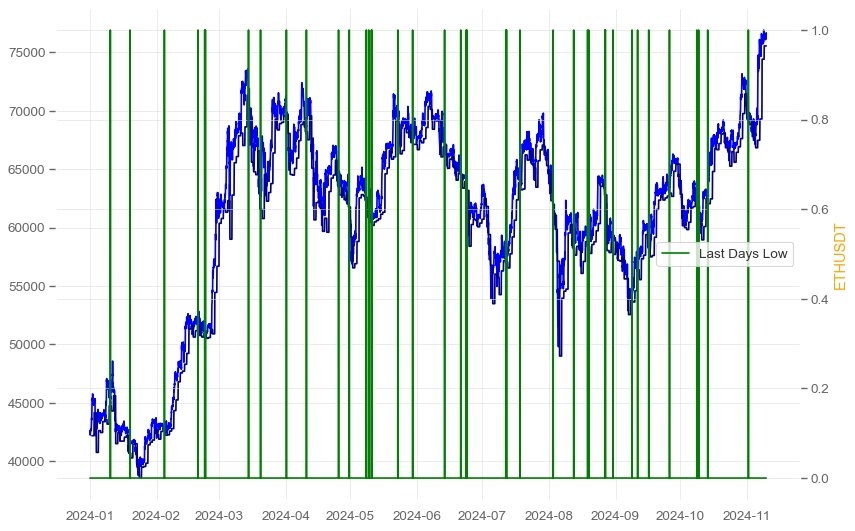

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8), dpi=80)

# Plotting the 'close' and 'shifted_daily_low' columns
plt.plot(df['close', 'BTCUSDT'], color='blue', label='BTCUSDT Close')
plt.plot(df['shifted_htf_low', 'BTCUSDT'], color='navy', label='BTCUSDT Shifted Daily Low')

# Set up the second y-axis (for ETHUSDT)
ax1 = plt.gca()
ax2 = ax1.twinx()
# ax2.plot(df['close', 'ETHUSDT'], color='orange', label='ETHUSDT Close')
# ax2.plot(df['shifted_daily_low', 'ETHUSDT'], color='red', label='ETHUSDT Shifted Daily Low')
ax2.set_ylabel('ETHUSDT', color='orange')

# Plot reverse triangle (downward-pointing triangle) on the plot
plt.plot(df['last_days_low', 'BTCUSDT'], color='green', label='Last Days Low')

# Optional: Add a legend for the buy signal markers
plt.legend()

plt.show()


Putting Everything Together into one function

In [ ]:
def last_days_low(df, hourly_lookback = 1, daily_lookback = 1):
  #Getting parameters
  start_time = df.index.levels[0][0].strftime('%Y-%m-%d')
  end_time = df.index.levels[0][-1].strftime('%Y-%m-%d')
  symbols = df.index.levels[1].unique()

  #Get the daily data and clean it
  df_daily = Data(symbols, '1d', start_time, end_time).df
  df_daily = df_daily[['open', 'high', 'low', 'close']]
  df_daily = df_daily.unstack().shift(daily_lookback).stack(future_stack = True)
  df_daily.columns = [f'shifted_daily_{col}' for col in df_daily.columns]

  #Reindex the daily data to match the hourly data
  df_daily_reindexed = data_daily.unstack().reindex(data[~data.index.duplicated()].unstack().index.get_level_values(0))\
  .ffill().stack(future_stack = True)


  #Concatenate the dataframes
  df = pd.concat([df, df_daily_reindexed], axis = 1)

  #Now to generate a direction column:
  # 1 if the close is above the daily close and last open is above the daily close and last close is below the daily close, else 0

  #Before that, we need to make sure we are dealing with the same date when comparing the daily low with the hourly closes
  _df = df[[]] #We don't need any of the columns, just the index (removing them to make sure it runs faster)
  _df['date_only'] = _df.index.get_level_values(0).strftime('%Y-%m-%d') # Extract the date part from the datetime index
  _df['previous_date'] = _df['date_only'].shift(1) # Shift the date column by one row
  _df['same_date'] = _df['date_only'] == _df['previous_date'] # Compare the current date with the previous date
  df['same_date']  = _df['same_date']
  df = df.unstack() #We have to unstack because we will be shifting columns later on for every single coin

  

  #Direction column
  for coin in df.columns.get_level_values(1).unique():
    df['last_days_low', coin] = df['same_date', coin] & (df['open', coin].shift(hourly_lookback) > df['shifted_daily_low', coin]) &\
    (df['close', coin].shift(hourly_lookback) < df['shifted_daily_low', coin]) & (df['close', coin] > df['shifted_daily_low', coin]) &\
    (df['close', coin].shift(hourly_lookback + 1) > df['shifted_daily_low', coin]) #Ensures that price is pulling back to the daily low, and not going from below it to above it
  df['last_days_low'] = df['last_days_low'].astype(int)
  return df


In [ ]:
test = last_days_low(data, 1, 1)

C:\Users\yassi\AppData\Local\Temp\ipykernel_38712\2017718007.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['date_only'] = _df.index.get_level_values(0).strftime('%Y-%m-%d') # Extract the date part from the datetime index
C:\Users\yassi\AppData\Local\Temp\ipykernel_38712\2017718007.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['previous_date'] = _df['date_only'].shift(1) # Shift the date column by one row
C:\Users\yassi\AppData\Local\Temp\ipykernel_38712\2017718007.py:28: SettingWithCop

In [ ]:
test['last_days_low'].value_counts()

BTCUSDT  ETHUSDT
0        0          7458
         1            38
1        0            33
         1             6
Name: count, dtype: int64